In [1]:
import glob
from netCDF4 import Dataset
import pandas as pd
import numpy as np
import matplotlib as plt

In [2]:
# Record all the years of the netCDF files into a python list
all_years = []

In [3]:
for file in glob.glob('*.nc'):
    data = Dataset(file, 'r')
    time = data.variables['time']
    year = time.units[14:18]
    all_years.append(year)

In [4]:
# Creating an empty Pandas DataFrame covering the whole range of data
year_start = min(all_years)
end_year = max(all_years)
date_range = pd.date_range(start = str(year_start) + '-01-01',
                           end = str(end_year) + '-12-31',
                           freq = 'D')
df = pd.DataFrame(0.0,columns = ['Temperature'],index = date_range)

In [5]:
# Defining the lat, lon for the location of your interest
lat_katmandu = 27.697817
lon_katmandu = 85.329806

In [6]:
# sorting the all_years python list
all_years.sort()

In [7]:
for yr in all_years:
    # Reading the data
    data = Dataset(str(yr)+'.nc','r')
    
    # Storing the lat and lon data of the netCDF file into variables
    lat = data.variables['lat'][:]
    lon = data.variables['lon'][:]
    
    # Squared difference between the specified lat, lon and the lat,lon of the netCDF
    sq_diff_lat = (lat - lat_katmandu)**2
    sq_diff_lon = (lon - lon_katmandu)**2
    
    # Identify the index of the min value for lat and lon
    min_index_lat = sq_diff_lat.argmin()
    min_index_lon = sq_diff_lon.argmin()
    
    # Accesing the average temperature data
    temp = data.variables['tave']
    
    # Creating the data range for each year during each iteration
    start = str(yr) + '-01-01'
    end = str(yr) + '-12-31'
    d_range = pd.date_range(start = start,
                            end = end,
                            freq = 'D')
    
    for t_index in np.arange(0, len(d_range)):
        df.loc[d_range[t_index]]['Temperature'] = temp[t_index, min_index_lat, min_index_lon]

In [8]:
df.to_csv('Temperature_katmandu_1961_1966.csv')

In [9]:
data = pd.read_csv('Temperature_katmandu_1961_1966.csv')

<AxesSubplot:>

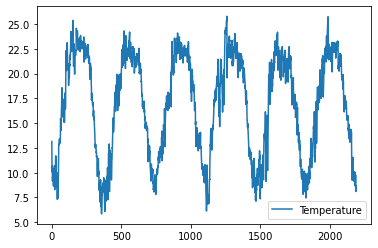

In [10]:
data.plot(kind = 'line')